# Linear Regression, Polynomial Regression and Regularization

### 1 - Dataset: artificial1d.csv. Linear regression model for:
 $$\begin{aligned}\hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w}\\\end{aligned}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Ler arquivo artificial1d.csv
data = np.genfromtxt('../data/artificial1d.csv', delimiter=',')

### a) Present the model parameters and the MSE (Mean Squared Error) obtained by the OLS (Ordinary Least Squares) algorithm. Plot the resulting line over the data.

In [8]:
# Bases
x = data[:,[0]]
y = data[:,[1]]

# Matriz X:
X = np.c_[np.ones(x.shape[0]),x]
X

array([[ 1.        , -1.        ],
       [ 1.        , -0.93103448],
       [ 1.        , -0.86206897],
       [ 1.        , -0.79310345],
       [ 1.        , -0.72413793],
       [ 1.        , -0.65517241],
       [ 1.        , -0.5862069 ],
       [ 1.        , -0.51724138],
       [ 1.        , -0.44827586],
       [ 1.        , -0.37931034],
       [ 1.        , -0.31034483],
       [ 1.        , -0.24137931],
       [ 1.        , -0.17241379],
       [ 1.        , -0.10344828],
       [ 1.        , -0.03448276],
       [ 1.        ,  0.03448276],
       [ 1.        ,  0.10344828],
       [ 1.        ,  0.17241379],
       [ 1.        ,  0.24137931],
       [ 1.        ,  0.31034483],
       [ 1.        ,  0.37931034],
       [ 1.        ,  0.44827586],
       [ 1.        ,  0.51724138],
       [ 1.        ,  0.5862069 ],
       [ 1.        ,  0.65517241],
       [ 1.        ,  0.72413793],
       [ 1.        ,  0.79310345],
       [ 1.        ,  0.86206897],
       [ 1.        ,

In [9]:
w = np.linalg.solve(X.T @ X,X.T @ y)
w

array([[0.06761792],
       [1.57486517]])

In [10]:
y_pred = X@w

In [11]:
print(np.shape(y_pred)) # N rows, 1 column: 30x1
print(np.shape(w)) # (D+1) x 1 column
print(np.shape(X)) # N rows, (D+1)

(30, 1)
(2, 1)
(30, 2)


In [12]:
def mse(y,y_pred):
    
    MSE = np.mean((y - y_pred)**2)
    return MSE

In [13]:
print("Parameters:", w)
print("MSE: ", mse(y,y_pred))

Parameters: [[0.06761792]
 [1.57486517]]
MSE:  0.21340090132936987


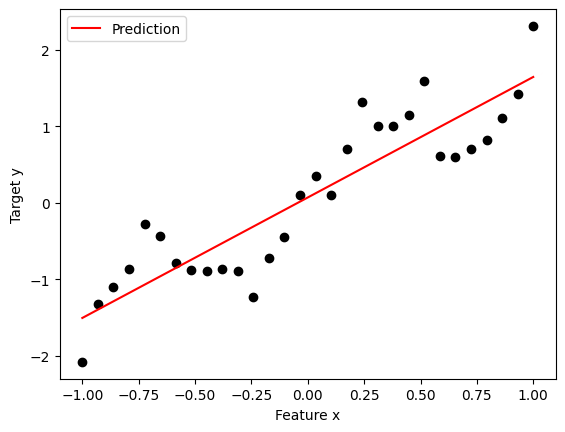

In [14]:
fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1], color = 'black')
plt.xlabel("Feature x")
plt.ylabel("Target y")
ax.plot(X[:,1],y_pred, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [15]:
# If it were normalize:
x = data[:,[0]]
x = (x - x.mean())/x.std()
y = data[:,[1]]
X = np.c_[np.ones(x.shape[0]),x]
#X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()
w = np.linalg.solve((X.T@X),(X.T@y))    
y_pred = X@w
y_pred = (y_pred*y.std())+ y.mean()
mse = np.mean((y - y_pred)**2)
w,mse

(array([[-5.10517103e-17],
        [ 8.97493907e-01]]),
 0.194504686655676)

### b) Present the model parameters, the MSE and the learning curve obtained by the GD (gradient descent) algorithm. Plot the resulting line over the data.

In [17]:
data = np.genfromtxt('../data/artificial1d.csv', delimiter=',')
x = data[:,[0]]
y = data[:,[1]]

In [18]:
# z-score normalization
x = (x - x.mean())/x.std()
X = np.c_[np.ones(x.shape[0]),x]
#X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()
print(X,y)

[[ 1.         -1.67524673]
 [ 1.         -1.55971247]
 [ 1.         -1.44417822]
 [ 1.         -1.32864396]
 [ 1.         -1.2131097 ]
 [ 1.         -1.09757545]
 [ 1.         -0.98204119]
 [ 1.         -0.86650693]
 [ 1.         -0.75097267]
 [ 1.         -0.63543842]
 [ 1.         -0.51990416]
 [ 1.         -0.4043699 ]
 [ 1.         -0.28883564]
 [ 1.         -0.17330139]
 [ 1.         -0.05776713]
 [ 1.          0.05776713]
 [ 1.          0.17330139]
 [ 1.          0.28883564]
 [ 1.          0.4043699 ]
 [ 1.          0.51990416]
 [ 1.          0.63543842]
 [ 1.          0.75097267]
 [ 1.          0.86650693]
 [ 1.          0.98204119]
 [ 1.          1.09757545]
 [ 1.          1.2131097 ]
 [ 1.          1.32864396]
 [ 1.          1.44417822]
 [ 1.          1.55971247]
 [ 1.          1.67524673]] [[-2.05225665]
 [-1.33142282]
 [-1.12006895]
 [-0.89891082]
 [-0.33667005]
 [-0.47617613]
 [-0.82330647]
 [-0.91048398]
 [-0.92368912]
 [-0.88735694]
 [-0.91237789]
 [-1.2445175 ]
 [-0.7515

In [19]:
# z-score normalization
alpha = 0.1
epochs = 100
N = X.shape[0]
w = np.zeros((X.shape[1],1))

mse_historical_gd = []

for i in range(epochs):
    error = y - X @ w 
    sum_error = np.zeros((w.shape[0],1)) # at each epoch the sum of ALL errors will be iterated in batch
    for i in range(N):
        sum_error += error[i]*X[[i]].T
    w += alpha*sum_error*(1/N)

    mse_historical_gd.append(np.mean((y - X @ w) ** 2))
    
y_pred = X@w
y_pred = (y_pred*y.std())+ y.mean()
mse = np.mean((y - y_pred)**2)
mse, w

(0.19450468722395933,
 array([[-5.44009282e-17],
        [ 8.97470068e-01]]))

Vetor de parâmetros: [[-5.44009282e-17]
 [ 8.97470068e-01]]
MRE: 0.19450468722395933


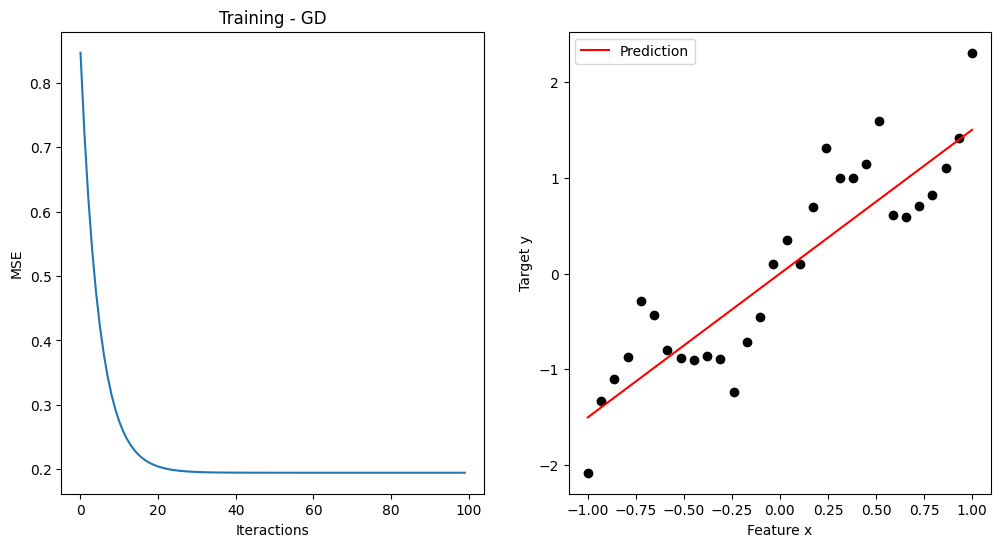

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2)

print("Vetor de parâmetros:", w)
print("MRE:", mse)
ax1.plot(mse_historical_gd);
ax1.figure.set_size_inches(12, 6)
ax1.set_title("Training - GD")
ax1.set(xlabel = "Iteractions", ylabel = "MSE");

ax2.scatter(data[:,0],data[:,1], color = 'black')
ax2.figure.set_size_inches(12, 6)
ax2.set(xlabel = "Feature x", ylabel = "Target y");
ax2.plot(data[:,0],y_pred, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

### c) Present the model parameters, the MSE and the learning curve obtained by the SGD algorithm (stochastic gradient descent). Plot the resulting line over the data.

In [21]:
data = np.genfromtxt('../data/artificial1d.csv', delimiter=',')
x = data[:,[0]]
y = data[:,[1]]

In [22]:
# z-score normalization
x = (x - x.mean())/x.std()
X = np.c_[np.ones(x.shape[0]),x]
y = (y - y.mean())/y.std()
print(X,y)

[[ 1.         -1.67524673]
 [ 1.         -1.55971247]
 [ 1.         -1.44417822]
 [ 1.         -1.32864396]
 [ 1.         -1.2131097 ]
 [ 1.         -1.09757545]
 [ 1.         -0.98204119]
 [ 1.         -0.86650693]
 [ 1.         -0.75097267]
 [ 1.         -0.63543842]
 [ 1.         -0.51990416]
 [ 1.         -0.4043699 ]
 [ 1.         -0.28883564]
 [ 1.         -0.17330139]
 [ 1.         -0.05776713]
 [ 1.          0.05776713]
 [ 1.          0.17330139]
 [ 1.          0.28883564]
 [ 1.          0.4043699 ]
 [ 1.          0.51990416]
 [ 1.          0.63543842]
 [ 1.          0.75097267]
 [ 1.          0.86650693]
 [ 1.          0.98204119]
 [ 1.          1.09757545]
 [ 1.          1.2131097 ]
 [ 1.          1.32864396]
 [ 1.          1.44417822]
 [ 1.          1.55971247]
 [ 1.          1.67524673]] [[-2.05225665]
 [-1.33142282]
 [-1.12006895]
 [-0.89891082]
 [-0.33667005]
 [-0.47617613]
 [-0.82330647]
 [-0.91048398]
 [-0.92368912]
 [-0.88735694]
 [-0.91237789]
 [-1.2445175 ]
 [-0.7515

In [23]:
alpha = 0.01
epochs = 50
N = X.shape[0]
w = np.zeros((X.shape[1],1)) # vetor inicial de w = 0
mse_historical_sgd = []

for i in range(epochs):
    for i in np.random.permutation(y.shape[0]):
        xi =X[[i]].T
        error = y[i] - w.T @ xi
        w = w + alpha*error*xi
    
        mse_historical_sgd.append(np.mean((y - X @ w) ** 2))
    
y_pred = X@w
y_pred = (y_pred*y.std())+ y.mean()
mse = np.mean((y - y_pred)**2)

Parameters vectors: [[0.00114426]
 [0.8958465 ]]
MRE: 0.19450870995018327


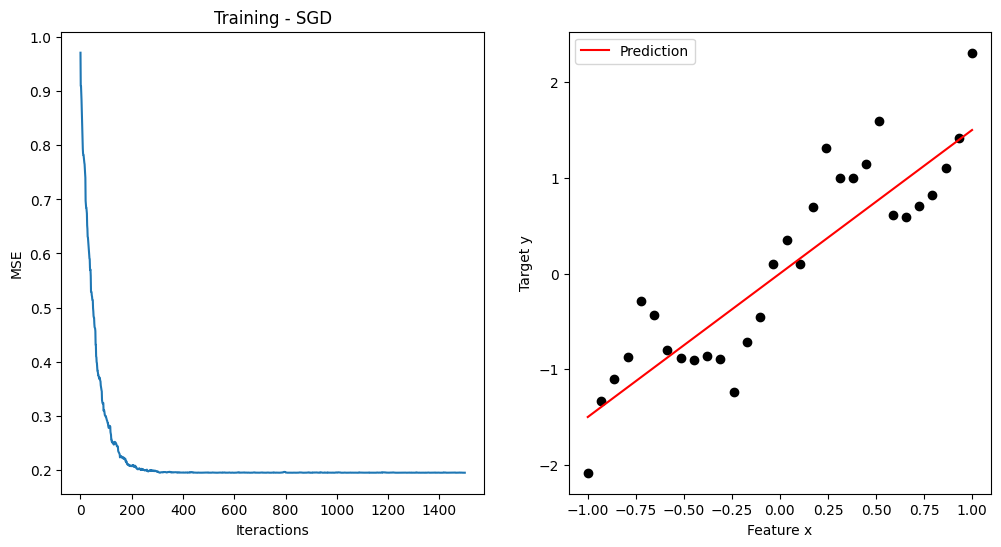

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))

print("Parameters vectors:", w)
print("MRE:", mse)
ax1.plot(mse_historical_sgd);

ax1.set_title("Training - SGD")
ax1.set(xlabel = "Iteractions", ylabel = "MSE");

ax2.scatter(data[:,0],data[:,1], color = 'black')

ax2.set(xlabel = "Feature x", ylabel = "Target y");
ax2.plot(data[:,0],y_pred, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

### 2 - Dataset: california.csv. Link: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [73]:
data_california = np.genfromtxt('../data/california.csv', delimiter=',')

In [82]:
x = data_california[:,[0,1,2,3,4,5,6,7]]
y = data_california[:,[8]]

In [83]:
# Normalization: MinMax
x_max = x.max(axis=0)
x_min = x.min(axis=0)
y_max = y.max()
y_min = y.min()
y_normalized = (y-y_min)/(y_max-y_min)
x_normalized = (x-x_min)/(x_max-x_min)

### a) Train/test: 80-20

In [84]:
x.shape, y.shape

((1000, 8), (1000, 1))

In [85]:
random_index = np.random.permutation(1000)
random_train_index = random_index[:800]
random_test_index = random_index[800:]
x_train = x_normalized[random_train_index]
y_train = y_normalized[random_train_index] 
x_test = x_normalized[random_test_index]
y_test = y_normalized[random_test_index]

### b) Train 13 polynomial regression models with orders from 1 to 13. Use the OLS algorithm.

In [86]:
# OLS:
point_train = []
point_test = []
polynomials = []

for i in range(1,14):

    polynomials.append(i)
    
    X_train = x_train
    X_test = x_test
    
    if i>1:
        for pot in range(2,i+1):
            X_train = np.c_[X_train, x_train**(pot)]
            X_test = np.c_[X_test, x_test**(pot)]
    X_train_pol = np.c_[np.ones(x_train.shape[0]), X_train]
    X_test_pol = np.c_[np.ones(x_test.shape[0]), X_test]
    
    #OLS:
    w = np.linalg.solve((X_train_pol.T @ X_train_pol),(X_train_pol.T @ y_train))
    y_pred_train = X_train_pol @ w
    
    # Denormalizing:
    y_true_desn = (y_train*(y_max - y_min))+y_min
    y_pred_desn = (y_pred_train*(y_max - y_min))+y_min
    rmse_train = np.sqrt(np.mean((y_true_desn - y_pred_desn)**2))
    point_train.append(rmse_train)
    
    y_pred_test = X_test_pol @ w
    
    # Denormalizing:
    y_true_desn = (y_test*(y_max - y_min))+y_min
    y_pred_desn = (y_pred_test*(y_max - y_min))+y_min
    
    rmse_test = np.sqrt(np.mean((y_true_desn - y_pred_desn)**2))
    point_test.append(rmse_test)

### c) Report the RMSE (Root Mean Squared Error) in training and testing for each model. Make a graph for the training and a graph for the test.

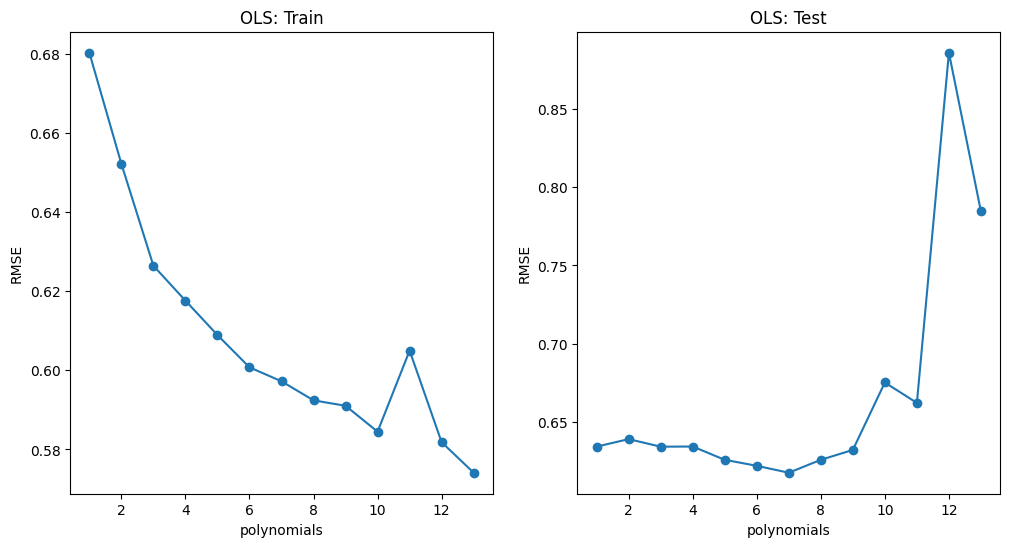

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))


ax1.plot(polynomials, point_train, marker = "o")
ax1.set_title("OLS: Train")
ax1.set(xlabel = "polynomials", ylabel = "RMSE");

ax2.plot(polynomials, point_test, marker = "o")
ax2.set_title("OLS: Test")
ax2.set(xlabel = "polynomials", ylabel = "RMSE");

### d) Repeat the previous 2 items including an L2 regularization term (eg with Lambda factor = 0.01).

In [88]:
point_train = []
point_test = []
polynomials = []
factor = 0.01
for i in range(1,14):
    
    polynomials.append(i)
    
    X_train = x_train
    X_test = x_test
    
    if i>1: 
        for pot in range(2,i+1):

            X_train = np.c_[X_train, x_train**pot]
            X_test = np.c_[X_test, x_test**pot]
    X_train_pol = np.c_[ X_train]
    X_test_pol = np.c_[ X_test]
    
    #OLS:
    w = np.linalg.solve((X_train_pol.T @ X_train_pol + (np.eye(len(X_train_pol.T @ X_train_pol)))*factor),(X_train_pol.T @ y_train))
    y_pred_train= X_train_pol @ w
    
    # Desnormalizando:
    y_true_desn = (y_train*(y_max - y_min))+y_min
    y_pred_desn = (y_pred_train*(y_max - y_min))+y_min
    rmse_train = np.sqrt(np.mean((y_true_desn - y_pred_desn)**2))
    point_train.append(rmse_train)
    
    y_pred_test = X_test_pol @ w
    
    # Desnormalizando:
    y_true_desn = (y_test*(y_max - y_min))+y_min
    y_pred_desn = (y_pred_test*(y_max - y_min))+y_min
    
    rmse_test = np.sqrt(np.mean((y_true_desn - y_pred_desn)**2))
    point_test.append(rmse_test)

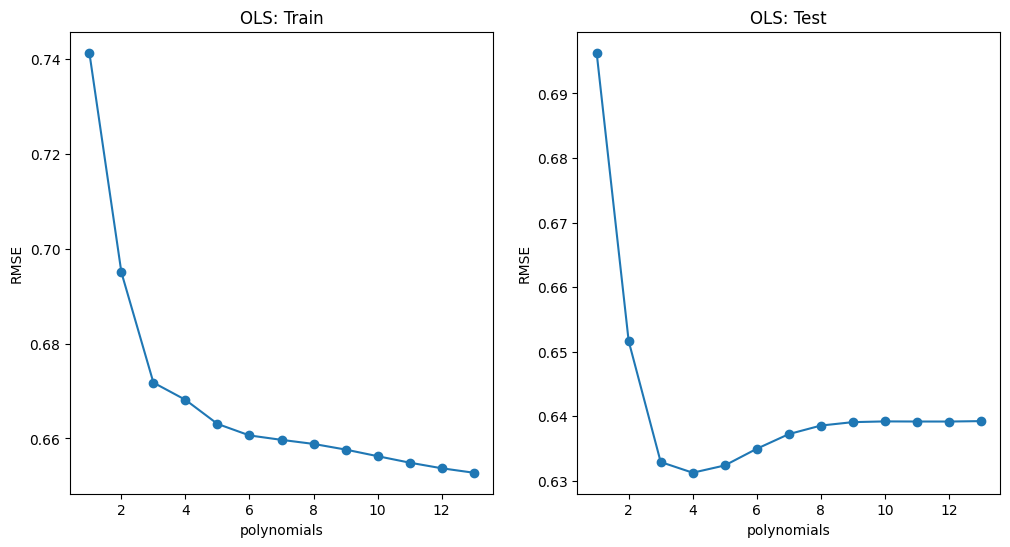

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.plot(polynomials, point_train, marker = "o")
ax1.set_title("OLS: Train")
ax1.set(xlabel = "polynomials", ylabel = "RMSE");

ax2.plot(polynomials, point_test, marker = "o")
ax2.set_title("OLS: Test")
ax2.set(xlabel = "polynomials", ylabel = "RMSE");